In [13]:
### imports ###
import pygmt
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as mpimg 
from mpl_toolkits.basemap import Basemap



%matplotlib inline
%matplotlib widget

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [16]:
### interactive pygmt the function ##

def interactive_pygmt(png_path, llcrnrlat, urcrnrlat, llcrnrlon, urcrnrlon, grid_freq):
    '''
    Creates an interactive map from a borderless pyGMT png where you can click to retrieve coordinates.

    Parameters:
        png_path (str): path to the borderless pyGMT map
        llcrnrlon (float): lower left corner longitude
        llcrnrlat (float): lower left corner latitude
        urcrnrlon (float): upper right corner longitude
        urcrnrlat (float): upper right corner latitude
        grid_freq (float): grid frequency (degrees)

    '''

    # determine image dimension
    img = Image.open(png_path)
    width, height = img.size # (width,height) tuple in pixels
    DPI_horz, DPI_vert = img.info.get('dpi')

    assert DPI_horz == DPI_vert

    fig = plt.figure(figsize=(width/DPI_horz, height/DPI_horz))
    ax1 = plt.subplot(111)

    # creating matplotlib basemap for overlay
    m = Basemap(projection='merc', resolution='i',\
                            llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat,\
                            llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon)
    
    m.drawcoastlines() # draws coastlines on matplotlib. this makes sure that everything is aligned

    # plotting parallels and meridians, annotating axis
    parallels = np.arange(-90, 90, grid_freq)
    meridians = np.arange(-180, 180, grid_freq)
    m.drawparallels(parallels, labels=[1,0,0,0], fontsize=12, linewidth=0.5) # label parallels on right and top
    m.drawmeridians(meridians, labels=[0,0,0,1], fontsize=12, linewidth=0.5) # meridians on bottom and left

    # plotting pygmt png image in bottom layer
    img = mpimg.imread(png_path)
    m.imshow(img, origin='upper')


    def pos_to_lonlat(x, y):
      lon, lat = m(x, y, inverse=True)
      return lon, lat
    
    pos = [] # in format [[None, None], [x, y], [x, y], ...]
    lonlat = []

    def onclick(event):
      pos.append([event.xdata, event.ydata])

      lon, lat = pos_to_lonlat(pos[-1][0], pos[-1][1]) # pos[-1] represents last click (list with x, y)
      lonlat.append([lon, lat]) # converts x y to lon lat and appends

      ax1.set_title(f'Click {len(pos)}: {lon}, {lat}') 

    
    cid=fig.canvas.mpl_connect('button_press_event', onclick)

    plt.show()

    return

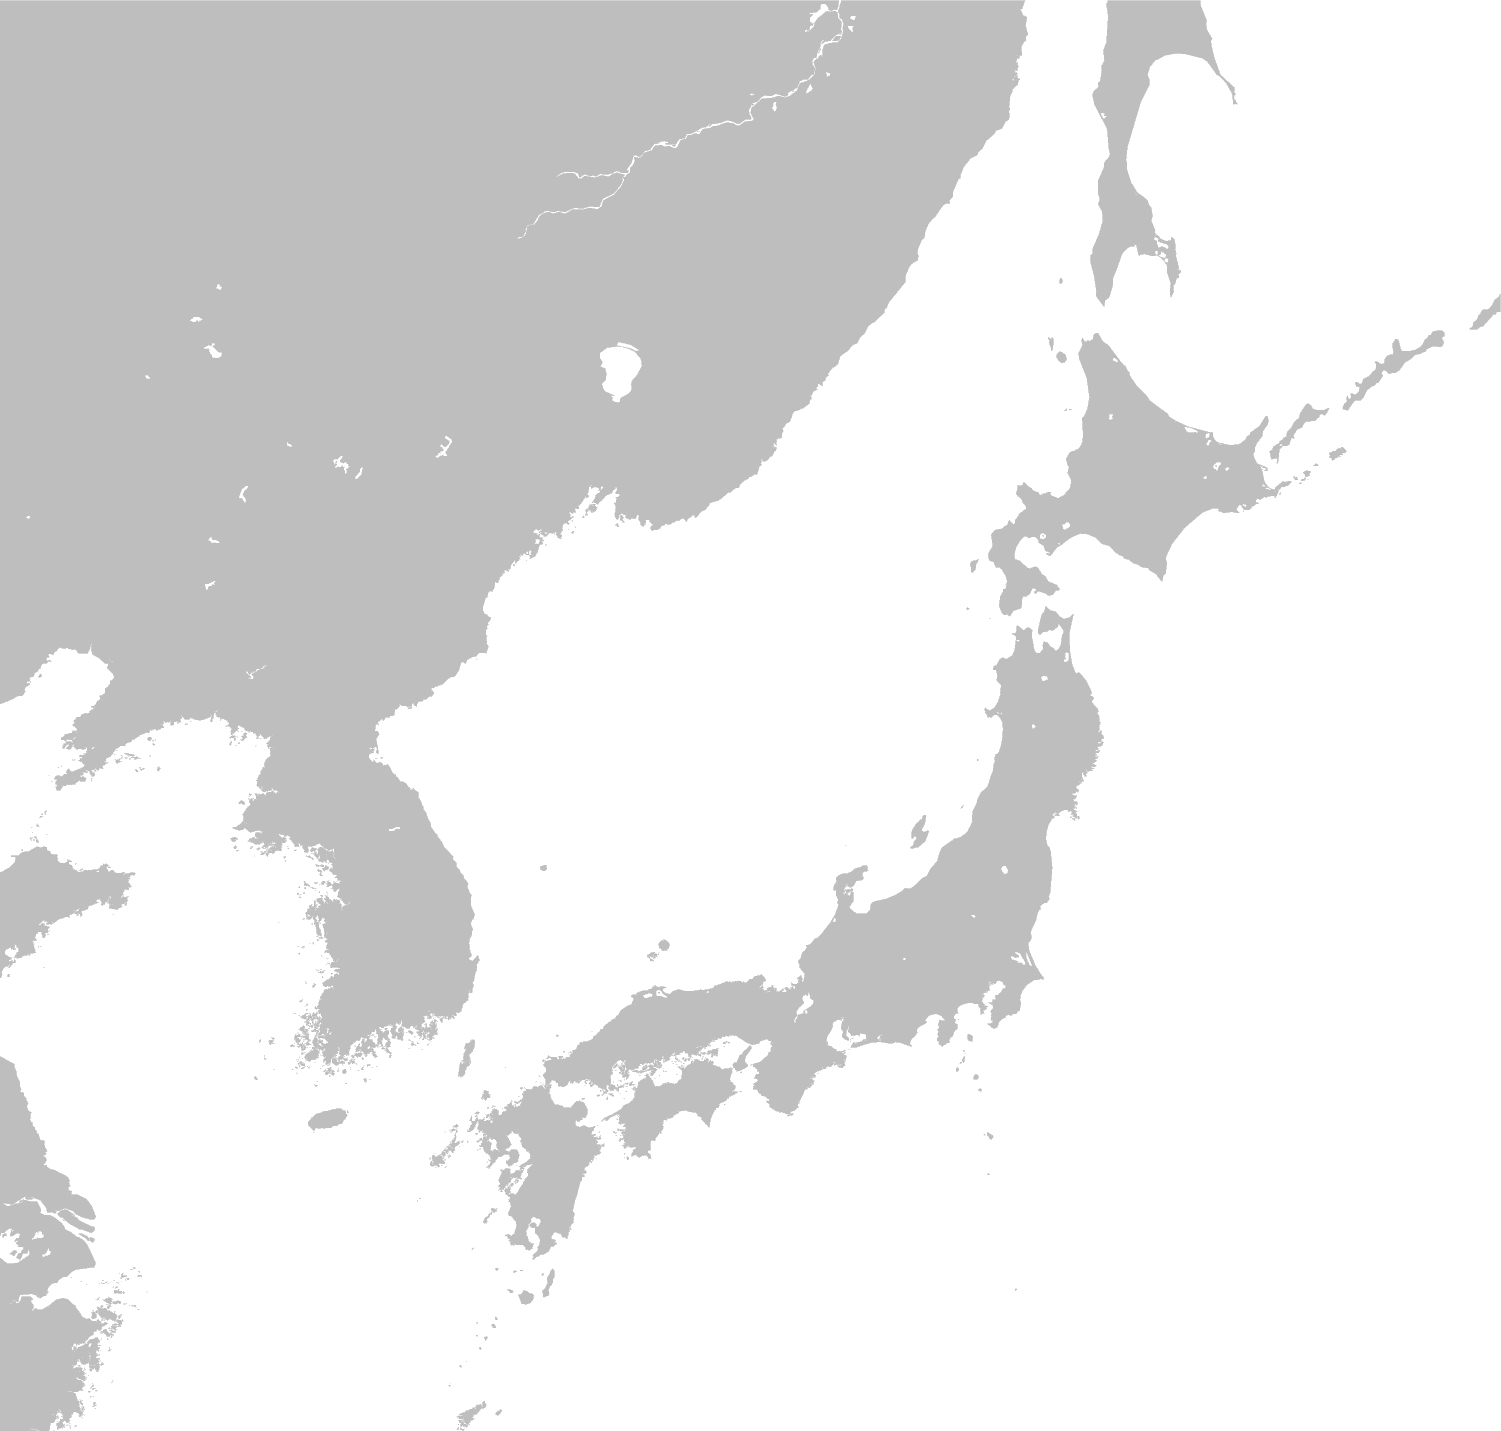

In [8]:
### GMT basemap ###

###########################################
## Specify coords
# llcrnrlat,llcrnrlon, urcrnrlat, urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map

llcrnrlon=120 # lower left corner longitude 
llcrnrlat=28 # lower left corner latitude
urcrnrlon=150 # upper right corner longitude
urcrnrlat=50 # upper right corner latitude

proj_scale_w = 5 # specify projection scale (width)
proj_scale_unit = "i" # choose between c (cm) and i (inches)

grid_freq = 5 # grid frequency (degrees)

###########################################

centerlon = (urcrnrlon - llcrnrlon)/2 + llcrnrlon # midpoints
centerlat = (urcrnrlat - llcrnrlat)/2 + llcrnrlat


fig = pygmt.Figure()
fig.coast(region=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat],\
          projection="M%s/%s/%s%s" % (centerlon, urcrnrlat, proj_scale_w, proj_scale_unit),\
          water="white", land="grey", shorelines=False)

          # Mercator
          # M[lon0/lat0] optionally sets central meridian and standard parallel
          # but idk how GMT determines the defaults so i left it in
fig.show()
fig.savefig("pygmt_base_map.png")

NameError: name 'Basemap' is not defined

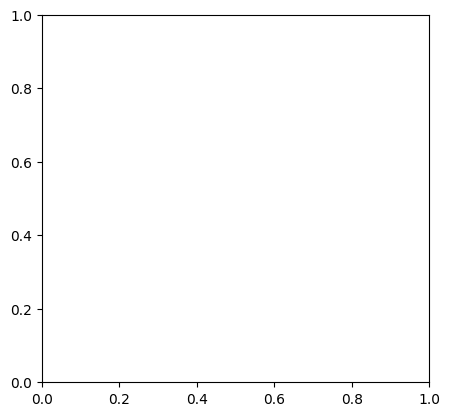

In [12]:
interactive_pygmt("pygmt_base_map.png", llcrnrlat, urcrnrlat, llcrnrlon, urcrnrlon, grid_freq)